# WeatherPy
----

### Analysis
* As expected, the cities closest to the equator (0 Deg. Latitude) are the warmest, with those just south of the equator following right behind. As you go further north from the equator, the weather seems to get a considerably amount colder.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* For Latitude vs Humidity, there really was no correlation at all. With high humidity percentages recorded from a solid range south to north.
* There is no significant relationship between latitude and wind speed. However, in northern hemispheres there are a quite a few cities that have wind speeds between 30 and 40 mph.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
geo_df = pd.DataFrame ({"lats": lats, "lngs":lngs})
geo_df.head()

,lats,lngs
0,51.196250,84.123772
1,-46.242119,59.306346
2,56.388754,-80.191698
3,-3.357793,172.121786
4,3.534297,24.862076


In [4]:

# Create relative lists and for loop for lat and lng
city = []
country = []


for index, row in geo_df.iterrows():
    city_lat=(row["lats"])
    city_lon=(row["lngs"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,soloneshnoye,ru
1,taolanaro,mg
2,attawapiskat,ca
3,utiroa,ki
4,buta,cd


In [5]:
weather_data = []


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:

# Loop through the cities list and perform a request for data on each

base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
record_counter = 0

for index, row in city_df.iterrows():
        record_counter+=1
        city_row =row["city"]
        response = requests.get(query_url + city_row).json()
        
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Retrieving record #{record_counter} -- {city_row}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_row}')
            print ("----------------------------------------------------------------")
        except:
            print (f"Weather for {city_row} not found.")
            print ("----------------------------------------------------------------")
            continue


Retrieving record #1 -- soloneshnoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=soloneshnoye
----------------------------------------------------------------
Weather for taolanaro not found.
----------------------------------------------------------------
Weather for attawapiskat not found.
----------------------------------------------------------------
Weather for utiroa not found.
----------------------------------------------------------------
Retrieving record #5 -- buta
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=buta
----------------------------------------------------------------
Retrieving record #6 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Retrieving record #7 -- yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yellowknife
-------

Retrieving record #50 -- jega
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jega
----------------------------------------------------------------
Retrieving record #51 -- isangel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=isangel
----------------------------------------------------------------
Retrieving record #52 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Retrieving record #53 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Retrieving record #54 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Weather for illoqqortoormiut not found.
-------------------------

Retrieving record #96 -- tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tasiilaq
----------------------------------------------------------------
Retrieving record #97 -- bontang
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bontang
----------------------------------------------------------------
Retrieving record #98 -- harper
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=harper
----------------------------------------------------------------
Weather for illoqqortoormiut not found.
----------------------------------------------------------------
Weather for bolshegrivskoye not found.
----------------------------------------------------------------
Retrieving record #101 -- kodiak
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kodiak
----------------------------------------------------------------
Retrieving record #102 -- brest
http

Retrieving record #143 -- narsaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=narsaq
----------------------------------------------------------------
Weather for belushya guba not found.
----------------------------------------------------------------
Retrieving record #145 -- karema
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=karema
----------------------------------------------------------------
Retrieving record #146 -- deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=deputatskiy
----------------------------------------------------------------
Retrieving record #147 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Retrieving record #148 -- bethel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bethel
-----------

Retrieving record #187 -- biltine
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=biltine
----------------------------------------------------------------
Retrieving record #188 -- yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yellowknife
----------------------------------------------------------------
Retrieving record #189 -- muros
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=muros
----------------------------------------------------------------
Retrieving record #190 -- pevek
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=pevek
----------------------------------------------------------------
Retrieving record #191 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
----------------------------------------------------------------
Retrieving record #192 -- east london
http://api.ope

Weather for barentsburg not found.
----------------------------------------------------------------
Retrieving record #234 -- kijang
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kijang
----------------------------------------------------------------
Retrieving record #235 -- carutapera
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=carutapera
----------------------------------------------------------------
Retrieving record #236 -- port keats
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port keats
----------------------------------------------------------------
Retrieving record #237 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Retrieving record #238 -- roma
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=roma
-----------

Retrieving record #278 -- muroto
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=muroto
----------------------------------------------------------------
Retrieving record #279 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
----------------------------------------------------------------
Retrieving record #280 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Retrieving record #281 -- grootfontein
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=grootfontein
----------------------------------------------------------------
Retrieving record #282 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Retrieving record #283 -- sibolga


Retrieving record #323 -- qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qaanaaq
----------------------------------------------------------------
Retrieving record #324 -- isangel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=isangel
----------------------------------------------------------------
Retrieving record #325 -- vilhena
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vilhena
----------------------------------------------------------------
Retrieving record #326 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Retrieving record #327 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Retrieving record #328 -- busselton
http://api.ope

Retrieving record #368 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
----------------------------------------------------------------
Retrieving record #369 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Retrieving record #370 -- adrar
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=adrar
----------------------------------------------------------------
Retrieving record #371 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Retrieving record #372 -- rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rio gallegos
----------------------------------------------------------------
Retrieving record #373 -- ribas do rio

Retrieving record #412 -- tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tazovskiy
----------------------------------------------------------------
Retrieving record #413 -- butaritari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=butaritari
----------------------------------------------------------------
Retrieving record #414 -- chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chokurdakh
----------------------------------------------------------------
Weather for bengkulu not found.
----------------------------------------------------------------
Retrieving record #416 -- provideniya
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=provideniya
----------------------------------------------------------------
Retrieving record #417 -- aljezur
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=al

Retrieving record #458 -- talnakh
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=talnakh
----------------------------------------------------------------
Retrieving record #459 -- quba
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=quba
----------------------------------------------------------------
Retrieving record #460 -- kodiak
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kodiak
----------------------------------------------------------------
Retrieving record #461 -- qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qaanaaq
----------------------------------------------------------------
Retrieving record #462 -- salalah
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=salalah
----------------------------------------------------------------
Retrieving record #463 -- saint-philippe
http://api.openwe

Retrieving record #503 -- ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ilulissat
----------------------------------------------------------------
Retrieving record #504 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Retrieving record #505 -- kapaa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kapaa
----------------------------------------------------------------
Retrieving record #506 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Retrieving record #507 -- cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cabo san lucas
----------------------------------------------------------------
Retrieving record #508 -- 

Retrieving record #548 -- narsaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=narsaq
----------------------------------------------------------------
Retrieving record #549 -- okha
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=okha
----------------------------------------------------------------
Retrieving record #550 -- lompoc
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lompoc
----------------------------------------------------------------
Retrieving record #551 -- ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ostrovnoy
----------------------------------------------------------------
Weather for attawapiskat not found.
----------------------------------------------------------------
Retrieving record #553 -- geraldton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=geraldton
----------------

Retrieving record #594 -- barrow
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=barrow
----------------------------------------------------------------
Retrieving record #595 -- grindavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=grindavik
----------------------------------------------------------------
Weather for bengkulu not found.
----------------------------------------------------------------
Retrieving record #597 -- banjar
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=banjar
----------------------------------------------------------------
Retrieving record #598 -- port alfred
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port alfred
----------------------------------------------------------------
Retrieving record #599 -- lagoa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lagoa
--------------

Retrieving record #641 -- bosaso
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bosaso
----------------------------------------------------------------
Retrieving record #642 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
----------------------------------------------------------------
Retrieving record #643 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cape town
----------------------------------------------------------------
Retrieving record #644 -- provideniya
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=provideniya
----------------------------------------------------------------
Retrieving record #645 -- hilo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hilo
----------------------------------------------------------------
Retrieving record #646 -- yatou
http://api.openw

Retrieving record #686 -- kokopo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kokopo
----------------------------------------------------------------
Retrieving record #687 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=atuona
----------------------------------------------------------------
Retrieving record #688 -- thompson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=thompson
----------------------------------------------------------------
Weather for jujuy not found.
----------------------------------------------------------------
Retrieving record #690 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cape town
----------------------------------------------------------------
Retrieving record #691 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
-----------------

Retrieving record #731 -- kawalu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kawalu
----------------------------------------------------------------
Weather for hihifo not found.
----------------------------------------------------------------
Retrieving record #733 -- mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mar del plata
----------------------------------------------------------------
Retrieving record #734 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Retrieving record #735 -- port hardy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port hardy
----------------------------------------------------------------
Weather for dien bien not found.
----------------------------------------------------------------
Retrieving record #737 -- cas

Retrieving record #777 -- qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qaanaaq
----------------------------------------------------------------
Retrieving record #778 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Retrieving record #779 -- cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cherskiy
----------------------------------------------------------------
Retrieving record #780 -- tiksi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tiksi
----------------------------------------------------------------
Retrieving record #781 -- mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mount gambier
----------------------------------------------------------------
Weather for olafsvik not found.
--------

Weather for marcona not found.
----------------------------------------------------------------
Retrieving record #823 -- bozeman
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bozeman
----------------------------------------------------------------
Retrieving record #824 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Retrieving record #825 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Retrieving record #826 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Retrieving record #827 -- ust-omchug
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ust-

Retrieving record #869 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Retrieving record #870 -- ambon
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ambon
----------------------------------------------------------------
Retrieving record #871 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Retrieving record #872 -- nelson bay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nelson bay
----------------------------------------------------------------
Retrieving record #873 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=atuona
----------------------------------------------------------------
Retrieving record #874 -- hobart
http:

Retrieving record #914 -- tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tasiilaq
----------------------------------------------------------------
Retrieving record #915 -- barra do garcas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=barra do garcas
----------------------------------------------------------------
Retrieving record #916 -- killarney
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=killarney
----------------------------------------------------------------
Retrieving record #917 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Retrieving record #918 -- grindsted
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=grindsted
----------------------------------------------------------------
Retrieving record #919 -

Retrieving record #958 -- qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qaanaaq
----------------------------------------------------------------
Retrieving record #959 -- vaini
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vaini
----------------------------------------------------------------
Retrieving record #960 -- cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cherskiy
----------------------------------------------------------------
Retrieving record #961 -- bitung
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bitung
----------------------------------------------------------------
Retrieving record #962 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
----------------------------------------------------------------
Retrieving record #963 -- mecca
http://api.openwea

Retrieving record #1005 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Retrieving record #1006 -- georgetown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=georgetown
----------------------------------------------------------------
Retrieving record #1007 -- zyryanka
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=zyryanka
----------------------------------------------------------------
Retrieving record #1008 -- bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bredasdorp
----------------------------------------------------------------
Retrieving record #1009 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Retrieving record #1010

Retrieving record #1051 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Retrieving record #1052 -- saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=saint-philippe
----------------------------------------------------------------
Retrieving record #1053 -- ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ribeira grande
----------------------------------------------------------------
Retrieving record #1054 -- ayala
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ayala
----------------------------------------------------------------
Retrieving record #1055 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Retriev

Retrieving record #1097 -- cidreira
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cidreira
----------------------------------------------------------------
Retrieving record #1098 -- bethel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bethel
----------------------------------------------------------------
Retrieving record #1099 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Retrieving record #1100 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Retrieving record #1101 -- gharghoda
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=gharghoda
----------------------------------------------------------------
Retrieving record #1102 -- kapa

Retrieving record #1142 -- kiunga
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kiunga
----------------------------------------------------------------
Retrieving record #1143 -- olinda
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=olinda
----------------------------------------------------------------
Retrieving record #1144 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Retrieving record #1145 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Retrieving record #1146 -- iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=iqaluit
----------------------------------------------------------------
Retrieving record #1147 -- lebu
http://ap

Retrieving record #1188 -- kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kaitangata
----------------------------------------------------------------
Retrieving record #1189 -- kapaa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kapaa
----------------------------------------------------------------
Retrieving record #1190 -- busselton
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=busselton
----------------------------------------------------------------
Retrieving record #1191 -- date
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=date
----------------------------------------------------------------
Retrieving record #1192 -- haines junction
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=haines junction
----------------------------------------------------------------
Retrieving record #1193 -- wi

Weather for meyungs not found.
----------------------------------------------------------------
Retrieving record #1234 -- yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yellowknife
----------------------------------------------------------------
Retrieving record #1235 -- nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nikolskoye
----------------------------------------------------------------
Retrieving record #1236 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Retrieving record #1237 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Weather for guelengdeng not found.
----------------------------------------------------------------
Retrieving recor

Retrieving record #1277 -- mitu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mitu
----------------------------------------------------------------
Retrieving record #1278 -- pak phanang
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=pak phanang
----------------------------------------------------------------
Retrieving record #1279 -- lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lavrentiya
----------------------------------------------------------------
Retrieving record #1280 -- upernavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=upernavik
----------------------------------------------------------------
Weather for bengkulu not found.
----------------------------------------------------------------
Retrieving record #1282 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punt

Retrieving record #1322 -- san patricio
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=san patricio
----------------------------------------------------------------
Retrieving record #1323 -- baghdad
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=baghdad
----------------------------------------------------------------
Retrieving record #1324 -- udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=udachnyy
----------------------------------------------------------------
Retrieving record #1325 -- moranbah
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=moranbah
----------------------------------------------------------------
Retrieving record #1326 -- severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=severo-kurilsk
----------------------------------------------------------------
Retrieving record

Retrieving record #1367 -- camacha
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=camacha
----------------------------------------------------------------
Retrieving record #1368 -- taksimo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=taksimo
----------------------------------------------------------------
Retrieving record #1369 -- shugurovo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=shugurovo
----------------------------------------------------------------
Retrieving record #1370 -- mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mahebourg
----------------------------------------------------------------
Weather for taolanaro not found.
----------------------------------------------------------------
Retrieving record #1372 -- orbetello
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=orbetello


Retrieving record #1412 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Retrieving record #1413 -- nchelenge
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nchelenge
----------------------------------------------------------------
Retrieving record #1414 -- port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port elizabeth
----------------------------------------------------------------
Retrieving record #1415 -- nome
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nome
----------------------------------------------------------------
Weather for illoqqortoormiut not found.
----------------------------------------------------------------
Retrieving record #1417 -- scarborough
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q

Retrieving record #1456 -- nara
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nara
----------------------------------------------------------------
Retrieving record #1457 -- barrow
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=barrow
----------------------------------------------------------------
Retrieving record #1458 -- port blair
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port blair
----------------------------------------------------------------
Retrieving record #1459 -- ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ahuimanu
----------------------------------------------------------------
Weather for barentsburg not found.
----------------------------------------------------------------
Weather for ngama not found.
----------------------------------------------------------------
Retrieving record #1462 -- bell ville
http

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Soloneshnoye,RU,51.65,52.01,66,80,5.95
1,Buta,CD,2.79,87.11,71,12,2.93
2,Mataura,NZ,-46.19,46.00,77,8,4.72
3,Yellowknife,CA,62.45,1.47,70,5,8.05
4,Bluff,AU,-23.58,80.45,41,44,10.65


In [8]:
weather_df.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

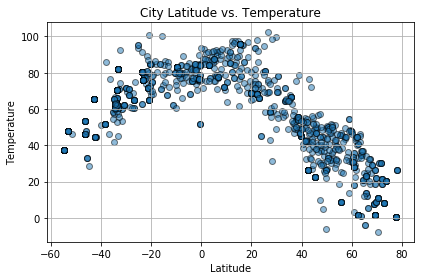

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.50, edgecolors="k")
plt.title(f"City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()


#### Latitude vs. Humidity Plot

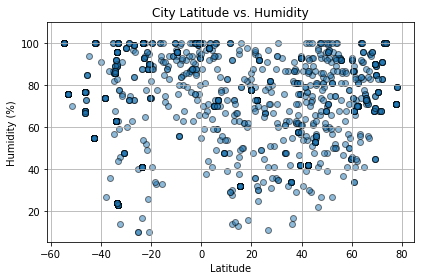

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.50, edgecolors="k")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(top=110)
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

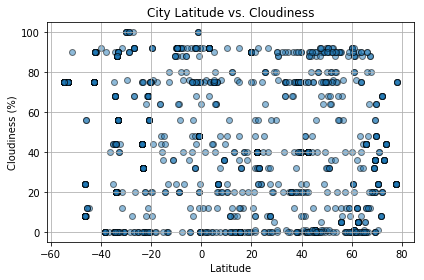

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.50, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

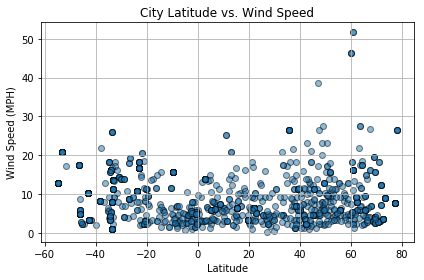

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.50, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("wind.png")
plt.show()